In [69]:
# https://finance.yahoo.com/quote/AAPL/history?period1=1514757600&period2=1517349600&interval=1d&filter=history&frequency=1d

In [70]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/csv_data/AAPL (5).csv')

In [71]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.890799,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.677595,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.213049,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.117680,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.161058,458707200


In [72]:
df1=df.iloc[:,[1,5]]
df1.head()

,Open,Adj Close
0,19.779285,16.890799
1,19.567142,16.677595
2,19.177500,16.213049
3,18.642857,16.117680
4,18.900356,16.161058


In [73]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))  #you must pass to MinMaxScaler function a 2D input
df1_scaled=scalar.fit_transform(df1)
df1_scaled

array([[0.19795893, 0.16061139],
       [0.19086893, 0.15348663],
       [0.17784675, 0.13796265],
       ...,
       [0.95814044, 0.9536882 ],
       [0.96566006, 0.95750769],
       [0.96164959, 0.94278656]])

In [74]:
split_percent=0.65
split=int(split_percent*len(df1_scaled))
split

818

In [75]:
train_data=df1_scaled[:split]
test_data=df1_scaled[split:]

In [76]:
len(train_data)

818

In [77]:
import numpy
#create dataset
def  create_dataset (dataset, time_step):
      data_x=[] 
      data_y=[]
      for i in range(len(dataset)-time_step):#i=0,1,2,3,4,....
          a=dataset[i:(i+time_step)]
          data_x.append(a)
          data_y.append(dataset[i+time_step])
      return numpy.array(data_x), numpy.array(data_y)

In [78]:
time_step=60
x_train,y_train=create_dataset (train_data, time_step)
x_test,y_test=create_dataset (test_data, time_step)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(758, 60, 2)
(758, 2)
(381, 60, 2)
(381, 2)


In [79]:
from keras.models import Sequential
from keras.layers import*

In [80]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step,2)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=2))

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10600     
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 51,102
Trainable params: 51,102
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [83]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 12s 137ms/step - loss: 0.0285
Epoch 2/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0024
Epoch 3/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0012
Epoch 4/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0011
Epoch 5/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0011
Epoch 6/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0010
Epoch 7/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0010
Epoch 8/100
24/24 [==============================] - 2s 85ms/step - loss: 9.9577e-04
Epoch 9/100
24/24 [==============================] - 3s 106ms/step - loss: 9.5953e-04
Epoch 10/100
24/24 [==============================] - 2s 90ms/step - loss: 8.9084e-04
Epoch 11/100
24/24 [==============================] - 2s 87ms/step - loss: 9.5981e-04
Epoch 12/100
24/24 [==============================] - 2s 85ms/step - loss: 8.5280e-04

In [84]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

12/12 [==============================] - 0s 23ms/step


In [85]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [86]:
y_train=scalar.inverse_transform(y_train)  #to make inverse transform
y_test=scalar.inverse_transform(y_test)

In [87]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,train_predict)  
mse_train

0.16291735342622965

In [88]:
mse_test=mean_squared_error(y_test,test_predict)  
mse_test

1.0123959702899752

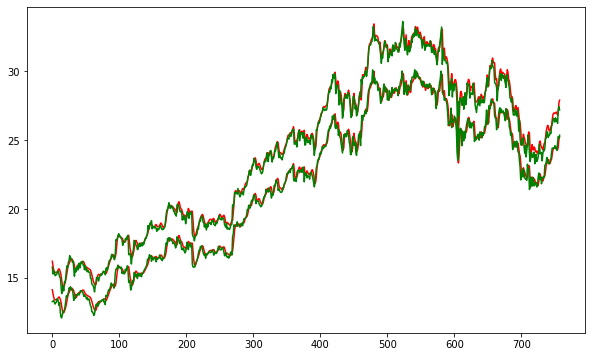

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train_predict,color='red',label="predictions stock")
plt.plot(y_train,color='green',label="actual stock")

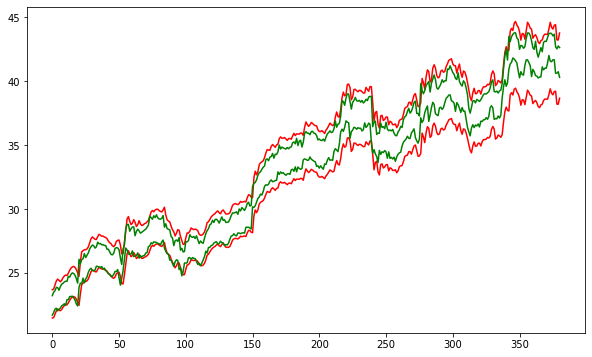

In [90]:
plt.figure(figsize=(10,6))
plt.plot(test_predict,color='red',label="predictions stock")
plt.plot(y_test,color='green',label="actual stock")

In [91]:
trainpredictplot=numpy.empty_like(df1)#create a new array with the same shape and type as a given array.
trainpredictplot[:,:]=numpy.nan
trainpredictplot[time_step:len(train_predict)+time_step,:]=train_predict
# trainpredictplot[time_step:len(train_data),:]=train_predict

In [92]:
testpredictplot=numpy.empty_like(df1)
testpredictplot[:,:]=numpy.nan
testpredictplot[split+time_step:len(test_predict)+split+time_step,:]=test_predict
# testpredictplot[len(train_data)+time_step:len(df1),:]=test_predict

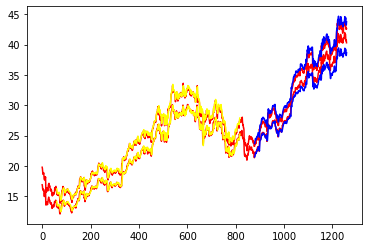

In [93]:
plt.plot(df1,color='red')
plt.plot(trainpredictplot,'yellow')
plt.plot(testpredictplot,color='blue')

In [100]:
# df=pd.read_csv('/content/drive/MyDrive/datasets/csv_data/AAPL (3).csv')
# df_new=df.iloc[:,[1,5]]
# x_new=df_new.values[0:60]
# x_new.shape

(60, 2)

In [101]:
df['Open'].head()

0    44.634998
1    43.200001
2    43.802502
3    44.477501
4    43.735001
Name: Open, dtype: float64

In [109]:
df=pd.read_csv('/content/drive/MyDrive/datasets/csv_data/AAPL (3).csv')
df_new=df.iloc[:,[1,5]]
x_new=df_new.values[1:61]
x_new.shape

(60, 2)

In [110]:
x_new=x_new.reshape(-1, 2)   # to make MinMaxScaler 
x_new.shape

(60, 2)

In [111]:
scalar=MinMaxScaler(feature_range=(0,1))
x_new_scaled=scalar.fit_transform(x_new)

In [112]:
x_new_scaled=x_new_scaled.reshape(1,60,2) # the  input to  lstm  must be 3D (#samples,timestep,#features)

y_new=model.predict(x_new_scaled)
y_new

1/1 [==============================] - 0s 46ms/step


array([[1.0279837 , 0.89886475]], dtype=float32)

In [113]:
scalar.inverse_transform(y_new)

array([[47.563908, 44.69227 ]], dtype=float32)

In [114]:
print(df_new.values[60:61])

[[47.057499 45.18652 ]]
